In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
import glob
import os

In [2]:
# Define the path to the CSV files
path = r"C:\Users\shubh\Documents\SME Data"

csv_files = glob.glob(os.path.join(path, "*.csv"))
data_frames = []

for file in csv_files:
    data = pd.read_csv(file)
    data_frames.append(data)
    
combined_data = pd.concat(data_frames, ignore_index=True)

combined_data.to_csv(os.path.join(path, 'combined_file.csv'), index=False)

In [3]:
combined_data.head(-20)

,Company Name,Exchange,Issue Open,Issue Close,Issue Price (Rs),Issuer Company,Open Date,Close Date,Listing Date,Lead Manager,Market Maker,Issue Size (Rs Cr.),Lot Size,Compare,Size (Rs Cr),QIB (x),NII (x),Retail (x),Total (x),Applications
0,TBI Corn Limited,NSE SME,"May 31, 2024","Jun 04, 2024",94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Associated Coaters Limited,BSE SME,"May 30, 2024","Jun 03, 2024",121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aimtron Electronics Limited,NSE SME,"May 30, 2024","Jun 03, 2024",161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ztech India Limited,NSE SME,"May 29, 2024","May 31, 2024",110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Beacon Trusteeship Limited,NSE SME,"May 28, 2024","May 30, 2024",60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5327,Wise Travel India Limited,NaN,NaN,NaN,NaN,NaN,"Feb 12, 2024","Feb 14, 2024",NaN,NaN,NaN,NaN,NaN,NaN,94.68,106.69,375.56,108.76,163.46,"2,26,649 (108.76x)"
5328,Polysil Irrigation Systems Limited,NaN,NaN,NaN,NaN,NaN,"Feb 08, 2024","Feb 13, 2024",NaN,NaN,NaN,NaN,NaN,NaN,17.44,NaN,2.12,11.62,6.88,"8,898 (11.62x)"
5329,Rudra Gas Enterprise Limited,NaN,NaN,NaN,NaN,NaN,"Feb 08, 2024","Feb 12, 2024",NaN,NaN,NaN,NaN,NaN,NaN,14.16,NaN,286.62,404.38,350.75,"2,53,183 (475.02x)"
5330,Alpex Solar Limited,NaN,NaN,NaN,NaN,NaN,"Feb 08, 2024","Feb 12, 2024",NaN,NaN,NaN,NaN,NaN,NaN,74.52,141.48,502.31,351.89,324.03,"6,31,993 (351.89x)"


In [4]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5352 entries, 0 to 5351
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Name         800 non-null    object 
 1   Exchange             4940 non-null   object 
 2   Issue Open           388 non-null    object 
 3   Issue Close          388 non-null    object 
 4   Issue Price (Rs)     4936 non-null   object 
 5   Issuer Company       4552 non-null   object 
 6   Open Date            4960 non-null   object 
 7   Close Date           4964 non-null   object 
 8   Listing Date         2556 non-null   object 
 9   Lead Manager         4524 non-null   object 
 10  Market Maker         1244 non-null   object 
 11  Issue Size (Rs Cr.)  4548 non-null   object 
 12  Lot Size             4468 non-null   object 
 13  Compare              0 non-null      float64
 14  Size (Rs Cr)         412 non-null    float64
 15  QIB (x)              244 non-null    f

In [5]:
combined_data.drop(columns=["Compare", "Issue Open", "Issue Close", "Size (Rs Cr)", "QIB (x)", "NII (x)", "Retail (x)", "Total (x)", "Applications"], inplace = True)

In [6]:
combined_data['Lot Size'] = combined_data['Lot Size'].str.replace(',', '').astype(float)

In [7]:
def clean_issue_price(value):
    if pd.isna(value):
        return value
    try:
        return float(value)
    except ValueError:
        # Handle the range case
        if 'to' in value:
            low, high = value.split(' to ')
            return (float(low) + float(high)) / 2
        return float(value)

In [8]:
combined_data['Issue Price (Rs)'] = combined_data['Issue Price (Rs)'].apply(clean_issue_price)

In [9]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5352 entries, 0 to 5351
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Name         800 non-null    object 
 1   Exchange             4940 non-null   object 
 2   Issue Price (Rs)     4936 non-null   float64
 3   Issuer Company       4552 non-null   object 
 4   Open Date            4960 non-null   object 
 5   Close Date           4964 non-null   object 
 6   Listing Date         2556 non-null   object 
 7   Lead Manager         4524 non-null   object 
 8   Market Maker         1244 non-null   object 
 9   Issue Size (Rs Cr.)  4548 non-null   object 
 10  Lot Size             4468 non-null   float64
dtypes: float64(2), object(9)
memory usage: 460.1+ KB


In [10]:
combined_data.head()

,Company Name,Exchange,Issue Price (Rs),Issuer Company,Open Date,Close Date,Listing Date,Lead Manager,Market Maker,Issue Size (Rs Cr.),Lot Size
0,TBI Corn Limited,NSE SME,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Associated Coaters Limited,BSE SME,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aimtron Electronics Limited,NSE SME,161.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ztech India Limited,NSE SME,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Beacon Trusteeship Limited,NSE SME,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'IPOs listed on BSE/NSE'}, xlabel='Exchange', ylabel='Numbers'>

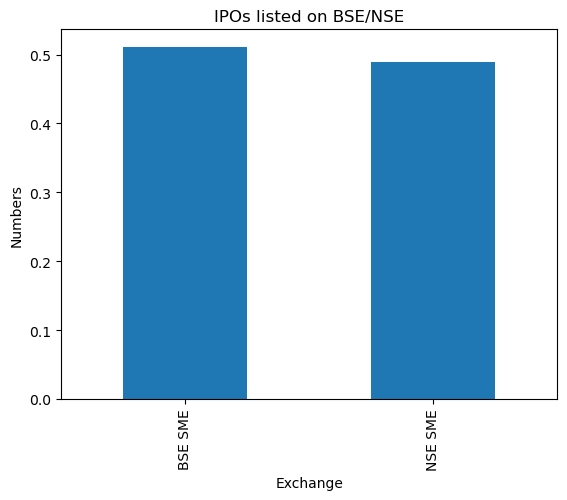

In [11]:
combined_data["Exchange"].value_counts(normalize=True).plot(kind="bar", xlabel = "Exchange", ylabel = "Numbers", title="IPOs listed on BSE/NSE")

In [12]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '4500-5000']

# Segment 'Lot Size' using pd.cut()
combined_data['Lot Size Segment'] = pd.cut(combined_data['Lot Size'], bins=bins, labels=labels, right=False)

In [13]:
print(combined_data['Lot Size Segment'].value_counts(normalize=True))

Lot Size Segment
2000-2500    0.238889
3000-3500    0.215556
1000-1500    0.177778
4000-4500    0.145556
1500-2000    0.142222
500-1000     0.070000
0-500        0.010000
2500-3000    0.000000
3500-4000    0.000000
4500-5000    0.000000
Name: proportion, dtype: float64


In [14]:
bins = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]
labels = ['500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500']

# Segment 'Lot Size' using pd.cut()
combined_data['Lot Size Segment'] = pd.cut(combined_data['Lot Size'], bins=bins, labels=labels, right=False)
combined_data = combined_data.sort_values(by='Lot Size Segment')

<Axes: title={'center': 'Lot size of IPOs listed on BSE/NSE'}, xlabel='Lot Size', ylabel='Number of IPOs'>

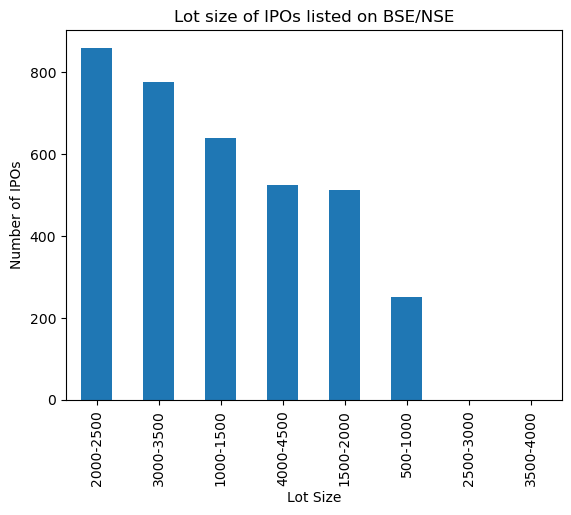

In [15]:
combined_data['Lot Size Segment'].value_counts().plot(kind="bar", xlabel = "Lot Size", ylabel = "Number of IPOs", title="Lot size of IPOs listed on BSE/NSE")

In [16]:
combined_data["Issue Price (Rs)"].max()

1229.0

In [17]:
combined_data["Issue Price (Rs)"].min()

10.0

In [18]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000-1100', '1100-1200', '1200-1300']

# Segment using pd.cut()
combined_data['Issue Price (Rs) Segment'] = pd.cut(combined_data['Issue Price (Rs)'], bins=bins, labels=labels, right=False)

In [20]:
print(combined_data['Issue Price (Rs) Segment'].value_counts(normalize=True))

Issue Price (Rs) Segment
0-100        0.804700
100-200      0.167747
200-300      0.020259
300-400      0.004052
400-500      0.000810
700-800      0.000810
900-1000     0.000810
1200-1300    0.000810
500-600      0.000000
600-700      0.000000
800-900      0.000000
1000-1100    0.000000
1100-1200    0.000000
Name: proportion, dtype: float64


In [24]:
bins = [0, 100, 200, 300, 400, 1200, 1300]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '1200-1300']

# Segment using pd.cut()
combined_data['Issue Price (Rs) Segment'] = pd.cut(combined_data['Issue Price (Rs)'], bins=bins, labels=labels, right=False)

<Axes: title={'center': 'Issue Price (Rs) Segment of IPOs listed on BSE/NSE'}, xlabel='Price range', ylabel='Number of IPOs'>

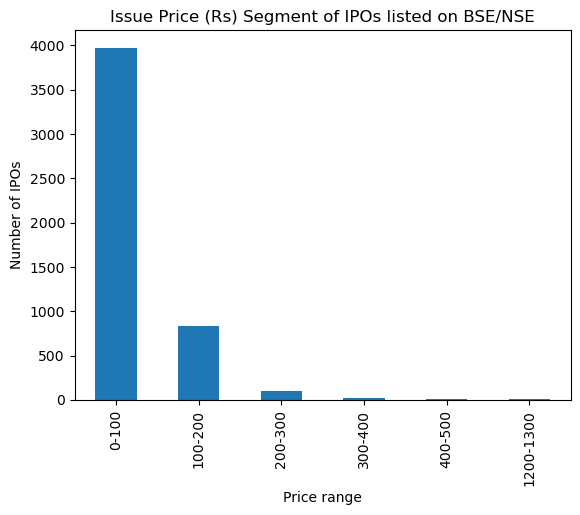

In [25]:
combined_data['Issue Price (Rs) Segment'].value_counts().plot(kind="bar", xlabel = "Price range", ylabel = "Number of IPOs", title="Issue Price (Rs) Segment of IPOs listed on BSE/NSE")